No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([<matplotlib.axis.YTick at 0x1ed3030bfd0>,
 [Text(0, 0.008002127763716706, '0.0080021'),
  Text(0, 0.007970147078663923, '0.0079701'),
  Text(0, 0.007948421778782064, '0.0079484'),
  Text(0, 0.00792636093979592, '0.0079264'),
  Text(0, 0.007903954034350803, '0.0079040'),
  Text(0, 0.007886915133328799, '0.0078869'),
  Text(0, 0.007863875747860634, '0.0078639'),
  Text(0, 0.007840458650766926, '0.0078405'),
  Text(0, 0.007804597078576081, '0.0078046')])

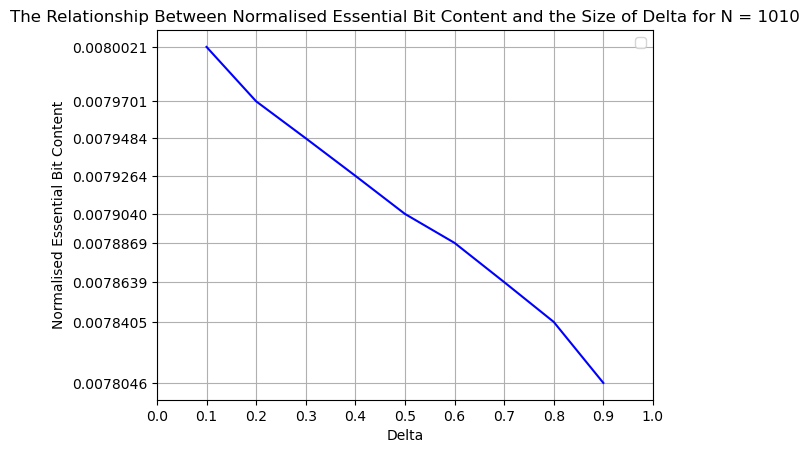

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import math

# the delta index
index = 0.1

# !!! ATTENTION !!! 
# please toggle this to see what the NEBC and delta values would look like together for different N values:
size = 1010

# probability of producing a Tails
p = 0.25

all_indexes = []
all_nebc = []

# setting up list of probabilities:

# SOURCE: https://medium.com/@c_safarli/binomial-distribution-probability-mass-function-cumulative-distribution-function-calculation-5ae74fd3a340
k = np.arange(0,size+1) # range of numbers from 0 to the index
binomial = binom.pmf(k=k, n=size, p=p) 

bisum = 0

for elem in binomial:
    bisum += elem

# higher probabilities have more 0's, hence they are located at the start of the list 
# and we need to reverse them for proper inspection
# SOURCE: https://stackoverflow.com/questions/6771428/most-efficient-way-to-reverse-a-numpy-array
binomial = binomial[::-1]

probability = 1

while (np.isclose(index, 1.0, rtol=1e-05, atol=1e-08, equal_nan=False) == False):

    target = 1 - index

    below = False

    while (below == False): 
        for prob in binomial:
            result = probability - prob
            if (result < target):
                below = True
                break
            else:
                probability -= prob
                binomial = np.delete(binomial, 0)

    ebc = math.log(len(binomial), 2)
    nebc = (1/(size)) * ebc

    all_nebc.append(nebc)
    all_indexes.append(index)

    index += 0.1

# Plot the NEBC against the delta values
plt.plot(all_indexes, all_nebc, color='blue')

# Labels and Legend
titlestring = 'The Relationship Between Normalised Essential Bit Content and the Size of Delta for N = ' + str(size)
plt.title(titlestring)
plt.xlabel('Delta')
plt.ylabel('Normalised Essential Bit Content')
plt.legend()
plt.grid()
plt.xticks(ticks=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
plt.yticks(ticks=all_nebc)
